In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


import seaborn as sns
import matplotlib.pyplot as plt

colors = {
    'bg': '#EFE8E8',
    'text': '#513838',
    
    'red': '#D64045',
    'blue': '#1064A8',
    'cyan_light': "#569178",
    'cyan': '#258E62',
    "green": "#007C48",
    'purple': '#582CA1',
    'orange': '#F57F25',
    'yellow': '#FCC427',
    'pink': '#C93679',
}

custom_palette = [
    colors['blue'], colors['red'], colors['green'], 
    colors['orange'], colors['purple'], colors['cyan']
]

custom_params = {
    "figure.facecolor": colors['bg'],
    "axes.facecolor": colors['bg'],
    "savefig.facecolor": colors['bg'],
    
    "text.color": colors['text'],
    "axes.labelcolor": colors['text'],
    "xtick.color": colors['text'],
    "ytick.color": colors['text'],
    "font.family": "sans-serif",
    
    "axes.grid": True,
    "grid.color": colors['text'],
    "grid.alpha": 0.15,
    "grid.linestyle": "-",
    "grid.linewidth": 0.8,
    
    "axes.spines.left": True,
    "axes.spines.bottom": True,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.edgecolor": colors['text'],
    "axes.linewidth": 0.8,
    
    "lines.linewidth": 1.5,
    "lines.markersize": 6,
}

sns.set_theme(
    context="talk",
    style="whitegrid",
    rc=custom_params,
    palette=custom_palette
)


In [102]:
df = pd.read_csv("groupped.csv")
df

,review_dttm,finish_dttm,id_client,company,review_mark,review_emotion,review_source,business_line,product,reason,review_theme,subtheme,review_text,solution_flg,gender_cd,education_level_cd,marital_status_cd,children_cnt,citizenship_country,segment_name,subscription_important_flg,new_flg,influencer_flg,age_segment,no_mark_flag,review_mark_numeric,is_credit_product,is_mobile_product
0,2025-02-18 15:41:00,2025-02-18 16:56:49.353,fb30834209a9c7f60612c64b82c75ffa,Банк,1,0,banki.ru,кредитные карты,Кредитные карты,Не определено,тарифы и условия,консультация по продукту,"Непрозрачные условия, скрытые комсисии. Почему...",проблема решена,M,NaN,UNM,0.0,РФ,Доходные,0.0,0.0,0.0,Молодежь,False,1,True,False
1,2025-03-24 20:06:00,2025-03-28 17:42:39.772,6601bfab426e4f56cc1e44d859683763,Страховая,1,0,banki.ru,страховая,Страхование,Не определено,страховое событие,жалоба по страховому случаю,"Обратился по каско , влетел камень в лобовое с...",проблема решена,M,NaN,NaN,NaN,РФ,NaN,NaN,NaN,NaN,NaN,False,1,False,False
2,2025-07-08 07:40:43,2025-07-08 10:29:04.740,f1f8eff66eaf2289f61deec744871d6b,Банк,5,1,banki.ru,депозитные продукты,Дебетовые карты,Не определено,мп/лк/терминал,установка/обновление приложения,Я уже очень давно пользуюсь услугами Тбанка и ...,не указано,M,GRD,MAR,0.0,РФ,Малодоходные,0.0,0.0,0.0,Взрослые,False,5,False,False
3,2025-08-07 22:51:48,2025-08-08 09:35:34.593,5ca669878eaf593f68c10e163246357b,SME,5,1,banki.ru,sme,Бизнес-продукты,Не определено,дополнительные услуги,консультация по услуге,"Уважаемое руководство Т- Банка,\n\n\nНастоящим...",не указано,F,GRD,MAR,0.0,РФ,Высокодоходные без ПМ,0.0,0.0,1.0,Взрослые,False,5,False,False
4,2025-02-13 21:38:40,2025-02-14 08:04:44.643,7a436100b113ce78c8a7a02974521a16,Банк,5,1,banki.ru,депозитные продукты,Дебетовые карты,Не определено,кэшбек,корректировка кэшбека,Выбрал на текущий месяц повышенный кэшбек на к...,не указано,M,NaN,NaN,0.0,РФ,Доходные,0.0,0.0,1.0,Сеньоры,False,5,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56815,NaN,2025-05-23 19:25:21.222,19a90f722e0088dbd5c1140326475d4c,Страховая,5,1,banki.ru,страховая,Страхование,Не определено,страховое событие,консультации по существующему страховому событию,Отдыхали в новый год в Тель-Авиве с ребёнком. ...,не указано,M,NaN,DIV,0.0,РФ,NaN,NaN,NaN,NaN,NaN,False,5,False,False
56816,NaN,2025-09-26 13:27:02.360,3e5ccb5ffa7055f82085ccd18b7190c4,Банк,5,1,sravni.ru,поддержка сотрудников,Не определено,Не определено,тарифы и условия,консультация по продукту,Здравствуйте я очень довольна работой группы п...,не указано,F,GRD,CIV,0.0,РФ,Доходные,0.0,0.0,0.0,Сеньоры,False,5,False,False
56817,NaN,2025-10-23 19:20:28.205,ff8dee14ae0b2c22593ab20ffb9d8e26,Банк,5,1,sravni.ru,депозитные продукты,Дебетовые карты,Не определено,мп/лк/терминал,консультация по интерфейсу,Банк и прилодение\nПо моему мнению лучший банк...,не указано,M,NaN,MAR,0.0,РФ,Доходные,0.0,0.0,0.0,Взрослые,False,5,False,False
56818,NaN,2025-09-02 13:35:01.523,b8deb649421f64fc4a5b6c71b350f528,Банк,5,1,banki.ru,премиальные сервисы,Премиальные продукты,Не определено,"платежи, переводы и операции",отмена / оспаривание,Огромная благодарность сотруднику Т-Банка (Лео...,не указано,M,NaN,NaN,0.0,РФ,Доходные,0.0,0.0,1.0,Взрослые,False,5,False,False


In [103]:
df["review_dttm"] = pd.to_datetime(df["review_dttm"], errors="coerce")
df["finish_dttm"] = pd.to_datetime(df["finish_dttm"], errors="coerce")

df.dropna(subset=["review_dttm", "finish_dttm"], inplace=True)
df["resolve_time"] = df["finish_dttm"] - df["review_dttm"]
df["resolve_time"] = df["resolve_time"].dt.total_seconds() // 3600
df

,review_dttm,finish_dttm,id_client,company,review_mark,review_emotion,review_source,business_line,product,reason,review_theme,subtheme,review_text,solution_flg,gender_cd,education_level_cd,marital_status_cd,children_cnt,citizenship_country,segment_name,subscription_important_flg,new_flg,influencer_flg,age_segment,no_mark_flag,review_mark_numeric,is_credit_product,is_mobile_product,resolve_time
0,2025-02-18 15:41:00,2025-02-18 16:56:49.353,fb30834209a9c7f60612c64b82c75ffa,Банк,1,0,banki.ru,кредитные карты,Кредитные карты,Не определено,тарифы и условия,консультация по продукту,"Непрозрачные условия, скрытые комсисии. Почему...",проблема решена,M,NaN,UNM,0.0,РФ,Доходные,0.0,0.0,0.0,Молодежь,False,1,True,False,1.0
1,2025-03-24 20:06:00,2025-03-28 17:42:39.772,6601bfab426e4f56cc1e44d859683763,Страховая,1,0,banki.ru,страховая,Страхование,Не определено,страховое событие,жалоба по страховому случаю,"Обратился по каско , влетел камень в лобовое с...",проблема решена,M,NaN,NaN,NaN,РФ,NaN,NaN,NaN,NaN,NaN,False,1,False,False,93.0
2,2025-07-08 07:40:43,2025-07-08 10:29:04.740,f1f8eff66eaf2289f61deec744871d6b,Банк,5,1,banki.ru,депозитные продукты,Дебетовые карты,Не определено,мп/лк/терминал,установка/обновление приложения,Я уже очень давно пользуюсь услугами Тбанка и ...,не указано,M,GRD,MAR,0.0,РФ,Малодоходные,0.0,0.0,0.0,Взрослые,False,5,False,False,2.0
3,2025-08-07 22:51:48,2025-08-08 09:35:34.593,5ca669878eaf593f68c10e163246357b,SME,5,1,banki.ru,sme,Бизнес-продукты,Не определено,дополнительные услуги,консультация по услуге,"Уважаемое руководство Т- Банка,\n\n\nНастоящим...",не указано,F,GRD,MAR,0.0,РФ,Высокодоходные без ПМ,0.0,0.0,1.0,Взрослые,False,5,False,False,10.0
4,2025-02-13 21:38:40,2025-02-14 08:04:44.643,7a436100b113ce78c8a7a02974521a16,Банк,5,1,banki.ru,депозитные продукты,Дебетовые карты,Не определено,кэшбек,корректировка кэшбека,Выбрал на текущий месяц повышенный кэшбек на к...,не указано,M,NaN,NaN,0.0,РФ,Доходные,0.0,0.0,1.0,Сеньоры,False,5,False,False,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,2025-04-21 09:38:33,2025-04-21 10:17:29.879,75ccfa73c7ade0e70c715b742991bf60,SME,5,1,banki.ru,sme,Бизнес-продукты,Не определено,дополнительные услуги,консультация по услуге,На протяжении долгого времени пользуюсь услуга...,не указано,M,NaN,NaN,0.0,УЗБЕКИСТАН,Доходные,0.0,0.0,0.0,Взрослые,False,5,False,False,0.0
51996,2025-05-14 16:48:48,2025-05-14 17:16:07.667,3752b5701b20b7e5fc922d68d656fe1e,SME,5,1,banki.ru,sme,Бизнес-продукты,Не определено,налоги,консультация по налогу,По моему вопросу со мной работал сотрудник Вла...,не указано,M,NaN,NaN,0.0,РФ,Доходные,0.0,0.0,0.0,Молодежь,False,5,False,False,0.0
51997,2025-08-02 14:34:00,2025-08-04 10:26:24.552,6bbed530c0286b2c78fd8695b7962577,Банк,1,0,суперапп,нефинансовые продукты,Lifestyle-сервисы,покупка билетов,дополнительные услуги,консультация по услуге,"Отсутсвие клиетского сервиса, некомпетентная п...",не указано,M,GRD,MAR,0.0,РФ,Доходные,0.0,0.0,1.0,Сеньоры,False,1,False,False,43.0
51998,2025-08-14 15:20:06,2025-08-14 15:58:03.047,b64fce82d4b5d1dfff152c0d19583320,Банк,5,1,banki.ru,кредитные карты,Кредитные карты,Не определено,тарифы и условия,комиссии,Всем доброго времени суток! Получилась такая с...,не указано,M,GRD,MAR,3.0,РФ,Доходные,0.0,0.0,0.0,Взрослые,False,5,True,False,0.0


In [104]:
df_mobile = df[df["is_mobile_product"]]

In [105]:
df["is_mobile_product"].value_counts()

is_mobile_product
False    15634
True       340
Name: count, dtype: int64

In [106]:
reviews_by_resolve_time_mobile = df_mobile.groupby("resolve_time").agg(
    review_mark=("review_mark", "mean"),
    review_emotion=("review_emotion", "mean"),
    reviews_count=("review_mark", "count")
).sort_values(by="review_mark", ascending=False)
reviews_by_resolve_time_mobile


,review_mark,review_emotion,reviews_count
resolve_time,,,
60.0,3.5,0.5,2
59.0,3.0,0.0,1
88.0,3.0,0.0,1
1435.0,3.0,0.0,1
166.0,3.0,0.0,1
...,...,...,...
12.0,1.0,0.0,2
98.0,1.0,0.0,1
303.0,1.0,0.0,1


In [107]:
reviews_by_resolve_time = df.groupby("resolve_time").agg(
    review_mark=("review_mark", "mean"),
    review_emotion=("review_emotion", "mean"),
    reviews_count=("review_mark", "count")
).sort_values(by="review_mark", ascending=False)
reviews_by_resolve_time

,review_mark,review_emotion,reviews_count
resolve_time,,,
443.0,5.0,1.0,1
1723.0,5.0,1.0,1
504.0,5.0,1.0,1
515.0,5.0,1.0,1
575.0,5.0,1.0,1
...,...,...,...
172.0,1.0,0.0,2
370.0,1.0,0.0,1
368.0,1.0,0.0,1


/var/folders/28/5cy4n6bn35n79ymr5smj3v7h0000gn/T/ipykernel_40380/3930924846.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(
/var/folders/28/5cy4n6bn35n79ymr5smj3v7h0000gn/T/ipykernel_40380/3930924846.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


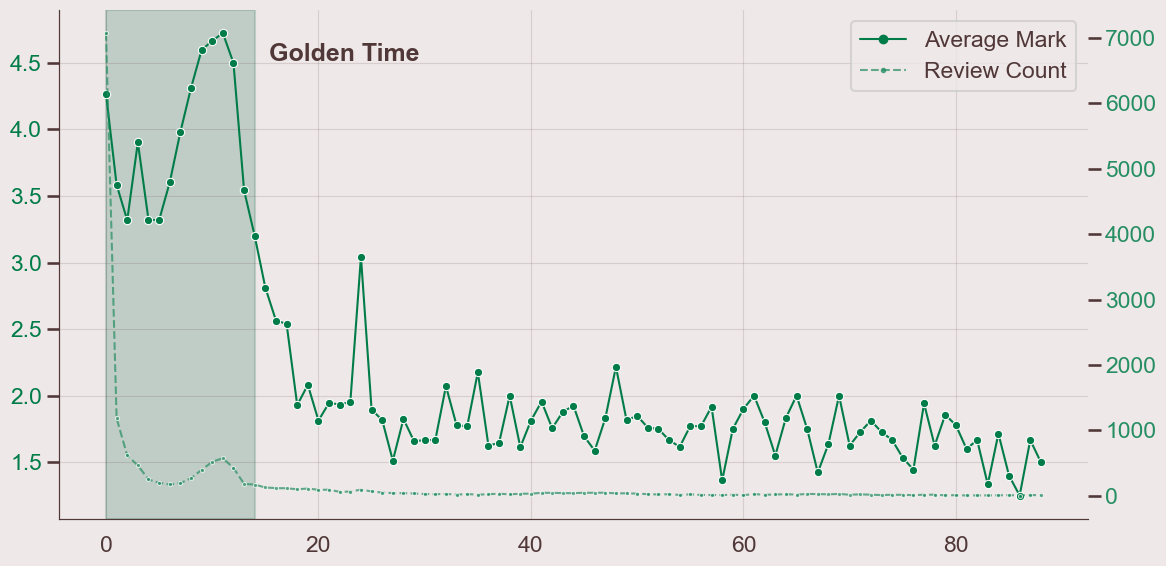

In [108]:
q95 = df["resolve_time"].quantile(0.95)
data_plot = reviews_by_resolve_time[reviews_by_resolve_time.index <= q95].reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

sns.lineplot(
    data=data_plot,
    x="resolve_time",
    y="review_mark",
    marker="o",
    color=colors['green'],
    ci=None,
    ax=ax1
)
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.tick_params(axis='y', labelcolor=colors['green'])

ax2 = ax1.twinx()
sns.lineplot(
    data=data_plot,
    x="resolve_time",
    y="reviews_count",
    marker=".",
    color=colors['cyan'],
    alpha=0.7,
    linestyle='--',
    ci=None,
    ax=ax2
)
ax2.set_ylabel(None, color=colors['cyan'])
ax2.tick_params(axis='y', labelcolor=colors['cyan'])
ax2.grid(False)

golden_start, golden_end = 0, 14
ax1.axvspan(golden_start, golden_end, color=colors['cyan_light'], alpha=0.3, zorder=0)
ax1.text(golden_end * 1.6, ax1.get_ylim()[0] + (ax1.get_ylim()[1]-ax1.get_ylim()[0])*0.9, 
         "Golden Time", horizontalalignment='center', color=colors['text'], fontweight='bold')

plt.title(None)

# Manual Legend to ensure distinct and correct labels
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color=colors['green'], marker='o', lw=1.5, label='Average Mark'),
    Line2D([0], [0], color=colors['cyan'], marker='.', linestyle='--', lw=1.5, alpha=0.7, label='Review Count')
]
ax1.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

In [109]:
len(df_mobile)

340

In [110]:
# Check the difference between percentiles
print(f"95th percentile of raw mobile data: {df_mobile['resolve_time'].quantile(0.95)}")
print(f"95th percentile of aggregated mobile data (unique resolve times): {reviews_by_resolve_time_mobile.index.to_series().quantile(0.95)}")
print(f"Max resolve time in mobile data: {df_mobile['resolve_time'].max()}")
print(f"Max resolve time in aggregated mobile data: {reviews_by_resolve_time_mobile.index.max()}")

95th percentile of raw mobile data: 482.10000000000025
95th percentile of aggregated mobile data (unique resolve times): 1207.1999999999998
Max resolve time in mobile data: 1463.0
Max resolve time in aggregated mobile data: 1463.0


In [111]:
# Check what's actually being filtered
q95_mobile = df_mobile["resolve_time"].quantile(0.95)
filtered_mobile = reviews_by_resolve_time_mobile[reviews_by_resolve_time_mobile.index <= q95_mobile]
print(f"Q95 for mobile: {q95_mobile}")
print(f"Total rows in aggregated mobile data: {len(reviews_by_resolve_time_mobile)}")
print(f"Rows after filtering to q95: {len(filtered_mobile)}")
print(f"Max resolve_time in filtered data: {filtered_mobile.index.max()}")
print(f"Total mobile reviews: {df_mobile['resolve_time'].count()}")
print(f"Mobile reviews within q95: {(df_mobile['resolve_time'] <= q95_mobile).sum()}")
print(f"Percentage: {(df_mobile['resolve_time'] <= q95_mobile).sum() / df_mobile['resolve_time'].count() * 100:.1f}%")

Q95 for mobile: 482.10000000000025
Total rows in aggregated mobile data: 113
Rows after filtering to q95: 96
Max resolve_time in filtered data: 481.0
Total mobile reviews: 340
Mobile reviews within q95: 323
Percentage: 95.0%


In [112]:
# Let's see the actual distribution of mobile data
print(f"Total mobile reviews: {len(df_mobile)}")
print(f"Unique resolve_time values in mobile: {df_mobile['resolve_time'].nunique()}")
print(f"\nResolve time distribution:")
print(df_mobile['resolve_time'].describe())
print(f"\nNumber of reviews at different resolve_time ranges:")
print(f"0-14 hours: {(df_mobile['resolve_time'] <= 14).sum()}")
print(f"15-50 hours: {((df_mobile['resolve_time'] > 14) & (df_mobile['resolve_time'] <= 50)).sum()}")
print(f"51-100 hours: {((df_mobile['resolve_time'] > 50) & (df_mobile['resolve_time'] <= 100)).sum()}")
print(f"101-482 hours: {((df_mobile['resolve_time'] > 100) & (df_mobile['resolve_time'] <= 482)).sum()}")
print(f">482 hours: {(df_mobile['resolve_time'] > 482).sum()}")

Total mobile reviews: 340
Unique resolve_time values in mobile: 113

Resolve time distribution:
count     340.000000
mean       83.476471
std       232.948985
min         0.000000
25%         1.000000
50%         8.000000
75%        45.250000
max      1463.000000
Name: resolve_time, dtype: float64

Number of reviews at different resolve_time ranges:
0-14 hours: 190
15-50 hours: 72
51-100 hours: 27
101-482 hours: 34
>482 hours: 17


/var/folders/28/5cy4n6bn35n79ymr5smj3v7h0000gn/T/ipykernel_40380/4132978028.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(
/var/folders/28/5cy4n6bn35n79ymr5smj3v7h0000gn/T/ipykernel_40380/4132978028.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


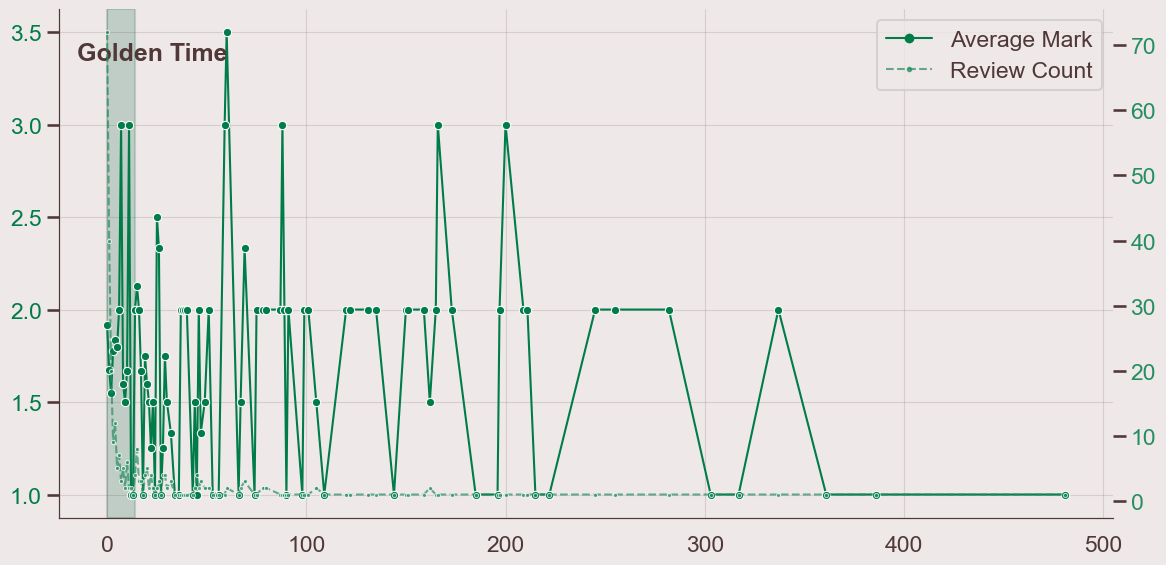

In [113]:
q95 = df_mobile["resolve_time"].quantile(0.95)
data_plot = reviews_by_resolve_time_mobile[reviews_by_resolve_time_mobile.index <= q95].reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

sns.lineplot(
    data=data_plot,
    x="resolve_time",
    y="review_mark",
    marker="o",
    color=colors['green'],
    ci=None,
    ax=ax1
)
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.tick_params(axis='y', labelcolor=colors['green'])

ax2 = ax1.twinx()
sns.lineplot(
    data=data_plot,
    x="resolve_time",
    y="reviews_count",
    marker=".",
    color=colors['cyan'],
    alpha=0.7,
    linestyle='--',
    ci=None,
    ax=ax2
)
ax2.set_ylabel(None, color=colors['cyan'])
ax2.tick_params(axis='y', labelcolor=colors['cyan'])
ax2.grid(False)

golden_start, golden_end = 0, 14
ax1.axvspan(golden_start, golden_end, color=colors['cyan_light'], alpha=0.3, zorder=0)
ax1.text(golden_end * 1.6, ax1.get_ylim()[0] + (ax1.get_ylim()[1]-ax1.get_ylim()[0])*0.9, 
         "Golden Time", horizontalalignment='center', color=colors['text'], fontweight='bold')

plt.title(None)

# Manual Legend to ensure distinct and correct labels
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color=colors['green'], marker='o', lw=1.5, label='Average Mark'),
    Line2D([0], [0], color=colors['cyan'], marker='.', linestyle='--', lw=1.5, alpha=0.7, label='Review Count')
]
ax1.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()